# Fault Detection of the so called Buccia di Arancia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

## Image Import

We find the current directory and import the related image

In [ ]:
# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "bucciaArancia")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "bianco2.png"),0)

print("Image Shape: ", img.shape)
print("Image min: ", img.min())
print("Image max: ", img.max())

img_shown = cv.resize(img, (800, 600))

# The image with the corners is shown
cv.imshow('Loaded Image', img_shown) # We show the found corners in the image
cv.waitKey(1000)
cv.destroyAllWindows()

Image Shape:  (1216, 1936)
Image min:  6
Image max:  170


## Calibration Parameters

We load the calibration parameters of the second setup, which was the one that we use for taking these photos, with the camera in a higher position

In [4]:
# We load the camera calibration results (We took the photos with the first camera setup)
cameraParameters = np.load(baseFolder + "/calibration/camera_setup2.npz")

# We extract the camera matrix and distortion coefficients, through the keys in the dictionary
mtx = cameraParameters['mtx']
dist = cameraParameters['dist']

## Undistorting the image

Based on the calibration procedure carried out, we are able to undistort the image of the cardboard

(np.float64(-0.5), np.float64(1873.5), np.float64(1158.5), np.float64(-0.5))

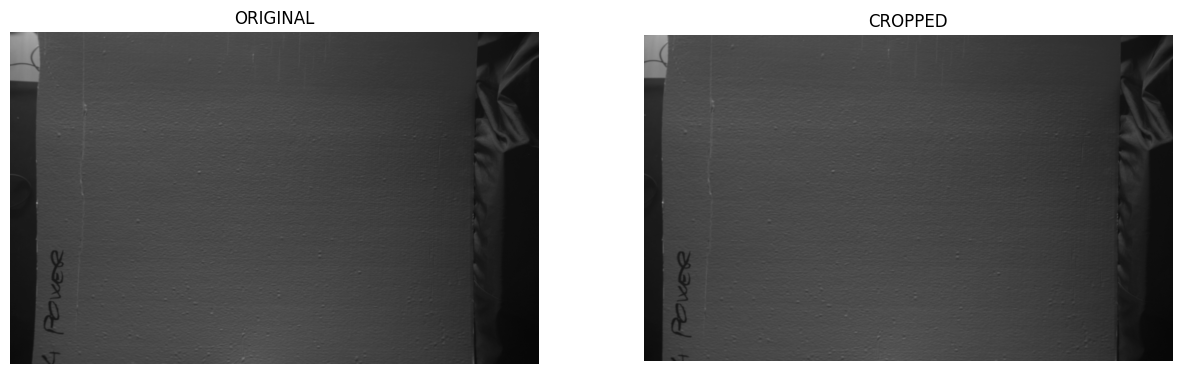

In [6]:
# We find the dimensions of the image
h, w = img.shape[:2]

# We find the new camera matrix and interested region
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# We undistort the image
udst_img = cv.undistort(img, mtx, dist, None, newcameramtx)

# We crop the image using the ROI
x_r, y_r, w_r, h_r = roi
udst_crop_img = udst_img[y_r:y_r+h_r, x_r:x_r+w_r]

# We show the images
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title("ORIGINAL")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(udst_crop_img, cmap="gray", vmin=0, vmax=255)
plt.title("CROPPED")
plt.axis("off")

## Histogram Inspection

We plot the histogram of the image to have a good idea of the picture contents and how is it distributed along the grey scale

Text(0, 0.5, 'Frequency')

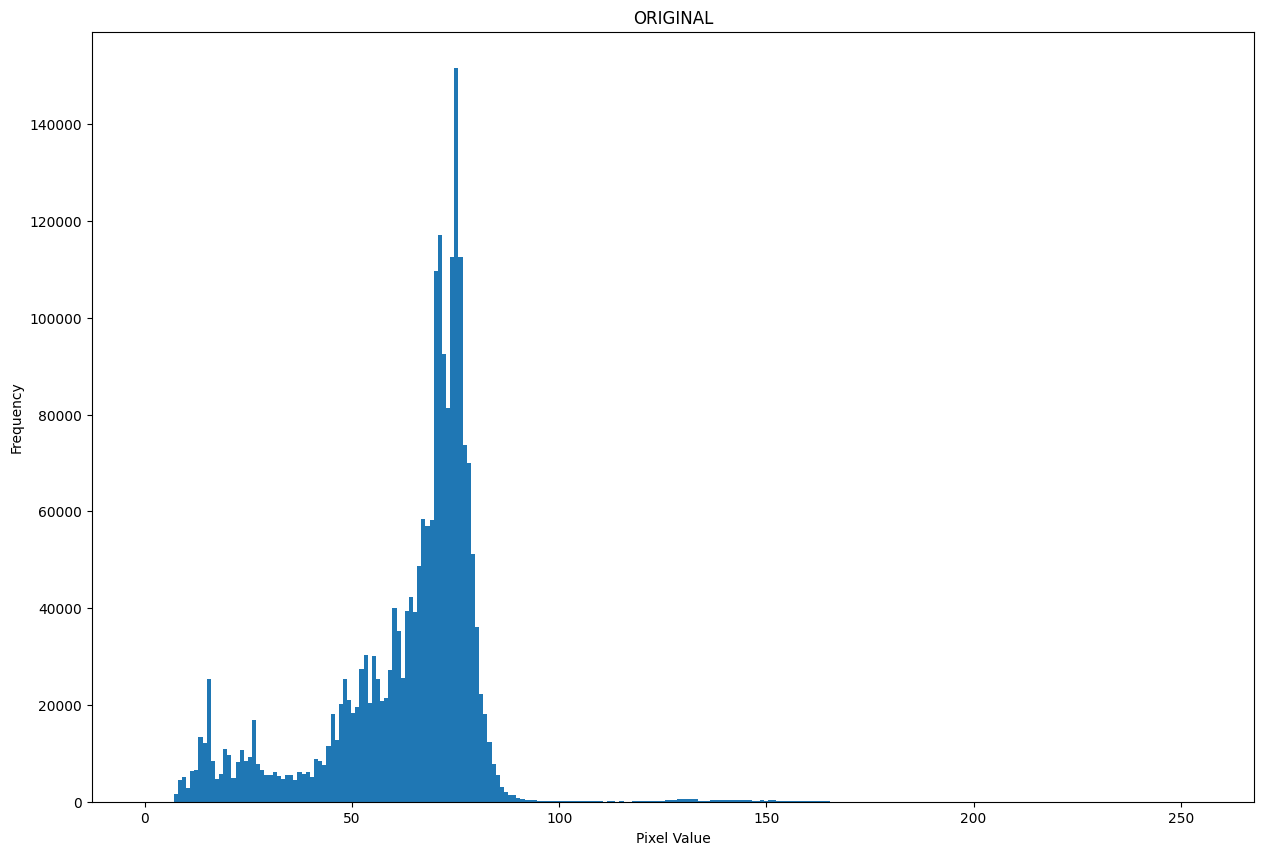

In [7]:
# We show the histogram of the image
plt.figure(figsize=(15, 10))
plt.hist(udst_crop_img.ravel(), bins=256, range=(0, 255))
plt.title("ORIGINAL")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")